# Problema de Classificação - UCI - Absenteeism_at_work

Esse notebook está usando uma base de dados aberta obtida em https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work.

Originalmente, como será observado, este dataset é para problemas de regressão, porém, criei uma reposta/target/variável dependente para este exercício.

In [88]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

import category_encoders as ce

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (StandardScaler
                                   , MinMaxScaler)

from sklearn.model_selection import (train_test_split
                                     , cross_val_score
                                     , StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix
                             , accuracy_score
                             , classification_report)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [89]:
nomeDaBase = "../bases/Absenteeism_at_work.csv"
df_original = pd.read_csv(nomeDaBase, sep=";", encoding="utf-8")

df = df_original.copy()

df.columns = df.columns.str.strip()

# Business understanding
Uma vez que essa base é de absenteísmo.
Objetivo: Avaliar dados incoerentes e ter uma ideia das relações entre os atributos.

In [90]:
dp.cardinalidade(df.select_dtypes(include=["int64", "int32", "object"]))

,Atributo,Cardinalidade,Valores
14,Social smoker,2,"[0, 1]"
13,Social drinker,2,"[0, 1]"
10,Disciplinary failure,2,"[0, 1]"
4,Seasons,4,"[1, 2, 3, 4]"
11,Education,4,"[1, 2, 3, 4]"
3,Day of the week,5,"[2, 3, 4, 5, 6]"
12,Son,5,"[0, 1, 2, 3, 4]"
15,Pet,6,"[0, 1, 2, 4, 5, 8]"
9,Hit target,13,"[81, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]"
2,Month of absence,13,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"


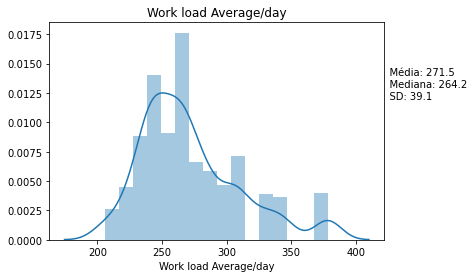

In [91]:
list_columns = list(df.select_dtypes(include="float64").columns)

for column in list_columns:
    sns.distplot(df[column])
    plt.title(column)
    plt.text(x=df[column].max()*1.1,y=0.012,s=f"""
    Média: {round(df[column].mean(),1)}
    Mediana: {round(df[column].median(),1)}
    SD: {round(df[column].std(),1)}""")

In [92]:
df = df[df["Month of absence"]!=0].copy()

In [93]:
def target_creation(number):
    if number > 2:
        return 1
    else:
        return 0

df["Target"] = df["Absenteeism time in hours"].apply(target_creation)

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Target
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,1
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,0
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,1
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,0


# Separando os datasets

In [94]:
## Remoção do atributo de identificação
df_ID = df["ID"]
df.drop(["ID"], axis=1, inplace=True)

x = df.drop(["Target", "Absenteeism time in hours"], axis=1)
y = df["Target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Preparando os Encodings

## Atributos cíclicos

In [95]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gusta\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

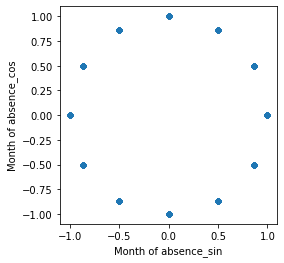

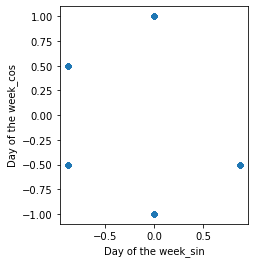

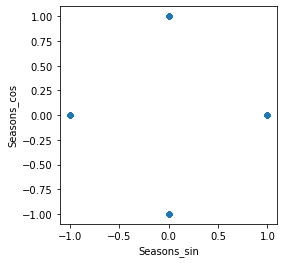

In [96]:
list_cyclic_features = ['Month of absence', 'Day of the week', 'Seasons']

for feature in list_cyclic_features:
    max_val = x_train[feature].max()
    x_train = encode(x_train, feature, max_val)
    x_train.drop([feature], axis=1, inplace=True)
    ax = x_train.plot.scatter(feature+"_sin", feature+"_cos").set_aspect('equal')

## Atributos categóricos

In [98]:
x_train.columns

Index(['Reason for absence', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Month of absence_sin',
       'Month of absence_cos', 'Day of the week_sin', 'Day of the week_cos',
       'Seasons_sin', 'Seasons_cos'],
      dtype='object')

In [102]:
list_categorical_features = ['Reason for absence', 'Hit target', 'Disciplinary failure'
                             , 'Education', 'Body mass index']

encoder = ce.TargetEncoder(cols=list_categorical_features)

x_train_encoded =encoder.fit_transform(x_train, y_train)

In [103]:
x_train_encoded

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Month of absence_sin,Month of absence_cos,Day of the week_sin,Day of the week_cos,Seasons_sin,Seasons_cos
12,0.611111,260,50,11,36,239.554,0.466667,0.626531,0.591885,4,1,0,0,65,168,0.840909,-5.000000e-01,-8.660254e-01,-8.660254e-01,-0.5,1.000000e+00,6.123234e-17
161,0.800000,179,26,9,30,343.253,0.537037,0.626531,0.573770,0,0,0,0,56,171,0.457143,1.000000e+00,6.123234e-17,-8.660254e-01,0.5,1.224647e-16,-1.000000e+00
235,0.487179,225,26,9,28,377.550,0.565217,0.626531,0.591885,1,0,0,2,69,169,0.476190,1.224647e-16,-1.000000e+00,-8.660254e-01,0.5,1.000000e+00,6.123234e-17
473,0.392857,118,13,18,50,230.290,0.642857,0.626531,0.591885,1,1,0,0,98,178,0.518868,-5.000000e-01,-8.660254e-01,-2.449294e-16,1.0,1.000000e+00,6.123234e-17
477,0.487179,246,25,16,41,230.290,0.642857,0.626531,0.591885,0,1,0,0,67,170,0.840909,-5.000000e-01,-8.660254e-01,1.224647e-16,-1.0,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.269231,179,26,9,30,275.089,0.627451,0.626531,0.573770,0,0,0,0,56,171,0.457143,1.224647e-16,-1.000000e+00,-8.660254e-01,-0.5,-1.000000e+00,-1.836970e-16
192,0.392857,118,13,18,50,326.452,0.627451,0.626531,0.591885,1,1,0,0,98,178,0.518868,8.660254e-01,-5.000000e-01,-8.660254e-01,0.5,-1.000000e+00,-1.836970e-16
629,0.916667,361,52,3,28,222.196,0.585366,0.626531,0.591885,1,1,0,4,80,172,0.769230,1.000000e+00,6.123234e-17,8.660254e-01,-0.5,1.224647e-16,-1.000000e+00
559,0.392857,225,26,9,28,280.549,0.750000,0.626531,0.591885,1,0,0,2,69,169,0.476190,-2.449294e-16,1.000000e+00,-2.449294e-16,1.0,-2.449294e-16,1.000000e+00
